In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
# In this section: Exact same code from the tutorial

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j * 4,(j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j


# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

# Generating a Y with the shape: [None, [0.0, 0.0, 1.0]]
y_ = np.zeros((N * K, K), dtype='uint8')
for i in range(N * K):
    for j in range(K):
        if j == y[i]:
            y_[i][j] = 1.0

plt.show()

In [ ]:
print(X.shape)
print(y.shape)

# Linear softmax classifier

In [ ]:
# 모델을 만들어봅시다!
# 딥러닝을 하기 전에 다중클래스 선형분류기(softmax)를 만들어보려고 합니다.
# 퍼셉트론은 activation이 없으면 선형모델과 정확히 동일하다고 했습니다.
# 퍼셉터론을 여러개 사용한 레이어는 다중선형모델, 즉 다중클래스 선형분류기로 만들 수 있다는 것을 지난 시간에 배웠습니다.
# 

layers = tf.keras.layers
linear_classifier = tf.keras.Sequential([layers.Dense(3,activation=None,input_shape=[2])])
# 첫번째 layer의 input shape은 정해주어야 합니다.
linear_classifier.add(layers.Softmax()) #모델 생성 후 layer를 블록 쌓듯 추가하고 싶을 때 add를 사용할 수 있습니다!

In [ ]:
# optimizer와 loss function들은 어떤 것들이 있을까요?
#dir(tf.keras.optimizers)
#dir(tf.keras.losses)

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001) # RMSprop optimizer와 학습률 0.001을 세팅해주었습니다.
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy() 
# 우리 label이 one-hot coding되지 않았으므로 SparseCategoricalCrossentropy를 선택합니다.
# tf.one_hot으로 label을 onehot coding 해줄 수도 있습니다. [0,1,2] => [[1,0,0],[0,1,0],[0,0,1]]
# 편의상 지SparseCategoricalCrossentropy을 많이 씁니다.
linear_classifier.compile(optimizer=optimizer, loss=cross_entropy, metrics=["acc"])

In [ ]:
linear_classifier.summary()

In [ ]:
linear_classifier.get_weights() 
# weight 2x3 , bias 3의 shape을 갖습니다.
# 다중클래스 선형분류기라는 것을 알 수 있습니다.
# 모델의 파라미터 shape으로부터 우리의 클래스 개수와 데이터 차원을 알 수 있나요?

In [ ]:
linear_classifier.fit(X, y, epochs=500)

# 딥러닝 모델을 만들고 동일한 실험을 해봅시다.

In [ ]:
layers = tf.keras.layers
neural_classifier = tf.keras.Sequential()
neural_classifier.add(layers.Dense(16, activation='relu', input_shape=[2]))
#먼저 한 블록은 채워두었습니다. input layer는 첫 레이어만 해주면 다음 레이어들은 자동을 결정됩니다.
neural_classifier.add( "이 자리에 layer를 넣어서 인공신경망을 더 쌓아줍시다." )
neural_classifier.add( "이 자리에 layer를 넣어서 인공신경망을 더 쌓아줍시다." )
neural_classifier.add( "이 자리에 layer를 넣어서 인공신경망을 더 쌓아줍시다." )
neural_classifier.add(layers.Softmax())

# 마지막 output layer(Dense)의 퍼셉트론은 몇 개가 되야 할까요? 그리고 그 이유는 무엇인가요?

In [ ]:
# optimizer와 loss를 정해주고, 모델을 compile 해봅시다.



In [ ]:
neural_classifier.summary()

In [ ]:
# 모델 학습. 정확도가 어떤가요?
neural_classifier.fit(X, y, epochs=500)

# ******** Discussion ********

## 아래의 셀을 실행하고 데이터셋을 봅시다.
## 변화한 것은 무엇이고, 따라서 인공신경망의 어떤 부분이 변해야할까요?

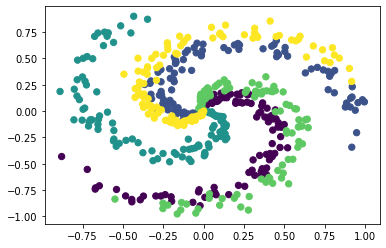

In [3]:
# In this section: Exact same code from the tutorial

N = 100 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes

X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j * 4,(j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j


# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

# Generating a Y with the shape: [None, [0.0, 0.0, 1.0]]
y_ = np.zeros((N * K, K), dtype='uint8')
for i in range(N * K):
    for j in range(K):
        if j == y[i]:
            y_[i][j] = 1.0

plt.show()